# Leaf Classification main Notebook

### Dependencies

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from utils import COMPILE,CALLBACKS
from config import *

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Preparing the Data

In [2]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
# DATA_ORGANIZER(df=train_df,dir = IMAGES_DIR)

In [3]:
train_img = image_dataset_from_directory(directory=TRAIN_IMAGES_DIR,
                                         image_size=IMAGE_SIZE,
                                         color_mode="grayscale",
                                         validation_split=VALIDATION_SPLIT,
                                         subset="training",
                                         seed=SEED)

val_img = image_dataset_from_directory(directory=TRAIN_IMAGES_DIR,
                                         image_size=IMAGE_SIZE,
                                         color_mode="grayscale",
                                         validation_split=VALIDATION_SPLIT,
                                         subset="validation",
                                         seed=SEED)

Found 990 files belonging to 99 classes.
Using 792 files for training.
Found 990 files belonging to 99 classes.
Using 198 files for validation.


In [4]:
batch = train_img.as_numpy_iterator().next()
class_names = train_img.class_names

print(class_names)

['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

### Vizualizing the data

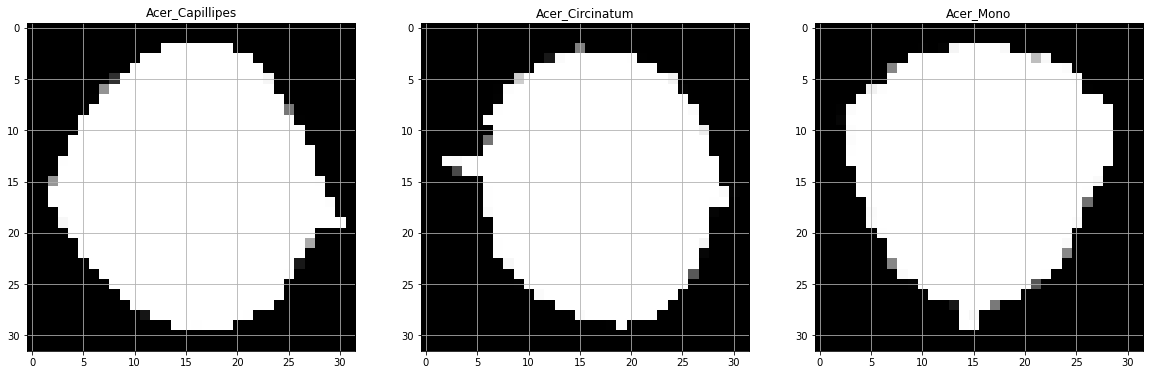

In [5]:
fig,ax = plt.subplots(ncols=3,figsize = (20,20))
for i,img in enumerate(batch[0][:3]):
    ax[i].imshow(img.astype(int),cmap = "gray")
    ax[i].title.set_text(class_names[i])
    ax[i].grid(True)

### Preprocessing the Data

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    horizontal_flip=HORIZONTAL_FLIP,
    validation_split=VALIDATION_SPLIT,
    fill_mode=FILMODE
)

preprocessed_train_img = train_datagen.flow_from_directory(
    directory=TRAIN_IMAGES_DIR,
    subset="training",
    shuffle=SHUFFLE_VALUE,
    seed=SEED,
    target_size=IMAGE_SIZE,
    color_mode= COLOR_MODE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE

)

preprocessed_val_img = train_datagen.flow_from_directory(
    directory=TRAIN_IMAGES_DIR,
    subset="validation",
    shuffle=SHUFFLE_VALUE,
    seed=SEED,
    target_size=IMAGE_SIZE,
    color_mode= COLOR_MODE,
    batch_size=VAL_BATCH_SIZE,
    class_mode=CLASS_MODE

)

Found 792 images belonging to 99 classes.
Found 198 images belonging to 99 classes.


### Training the neural network


In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=INPUT_SHAPE))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="tanh"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="tanh"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256,activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(99,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [10]:
callbacks = CALLBACKS.MODEL_CHECKPOINT_CALLBACK

model.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(preprocessed_train_img,validation_data=preprocessed_val_img,
          batch_size=BATCH_SIZE,
          validation_batch_size=VAL_BATCH_SIZE,
          epochs=EPOCHS)

Epoch 1/50
25/25 [==============================] - 1s 31ms/step - loss: 4.6384 - accuracy: 0.0152 - val_loss: 4.5073 - val_accuracy: 0.0404
Epoch 2/50
25/25 [==============================] - 1s 25ms/step - loss: 4.3592 - accuracy: 0.0391 - val_loss: 3.9712 - val_accuracy: 0.0909
Epoch 3/50
25/25 [==============================] - 1s 26ms/step - loss: 3.8632 - accuracy: 0.0947 - val_loss: 3.4439 - val_accuracy: 0.1919
Epoch 4/50
25/25 [==============================] - 1s 25ms/step - loss: 3.3722 - accuracy: 0.1982 - val_loss: 2.9845 - val_accuracy: 0.2525
Epoch 5/50
25/25 [==============================] - 1s 25ms/step - loss: 3.0080 - accuracy: 0.2424 - val_loss: 2.6960 - val_accuracy: 0.3131
Epoch 6/50
25/25 [==============================] - 1s 25ms/step - loss: 2.7700 - accuracy: 0.2689 - val_loss: 2.5575 - val_accuracy: 0.3182
Epoch 7/50
25/25 [==============================] - 1s 25ms/step - loss: 2.5053 - accuracy: 0.3422 - val_loss: 2.4030 - val_accuracy: 0.3737
Epoch 8/50
25